In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display, Markdown


In [103]:
data_train = pd.read_csv('/content/train.csv')


In [104]:
data_train.shape

(891, 12)

In [106]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
data_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [108]:
def data_diagnostic(df):
        print("#"*50)
        print(df.info())
        print("#"*50)
        print("The number of total rows  {x: .0f} ".format(x=df.shape[0]))
        print("The number of total variables {x: .0f} ".format(x=df.shape[1]))
        print("The variables names {x:} ".format(x=list(df.columns.values)))

        column_headers =list(df.columns.values)
        qualitative_columns = [col for col in column_headers if df[col].dtype=="object"]
        quantitative_columns = [col for col in column_headers if df[col].dtype in ['int64', 'float64']]

        print("The qualitative variables {x:} ".format(x=qualitative_columns))
        print("The quantitative variables {x:} ".format(x=quantitative_columns))
        print("#"*50)
        print("Total number missing value {x:} ".format(x=df.isnull().sum()))
        print("#"*50)
data_diagnostic(data_train)

##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
##################################################
The number of total rows   891 
The number of total variables  12 
The variables names ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex

In [109]:
data_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


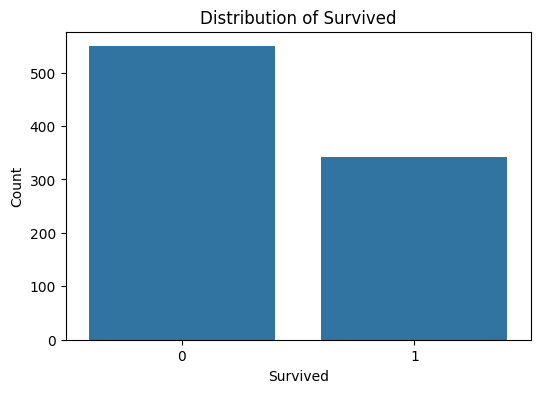

In [110]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data_train)
plt.title('Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

The plot for Survived showed the distribution of the Survived variable. From the bar chart, you can observe the count of passengers who survived (represented by 1) versus those who did not survive (represented by 0). It appeared that the number of people who did not survive was higher than those who did.

#Analyse univariée


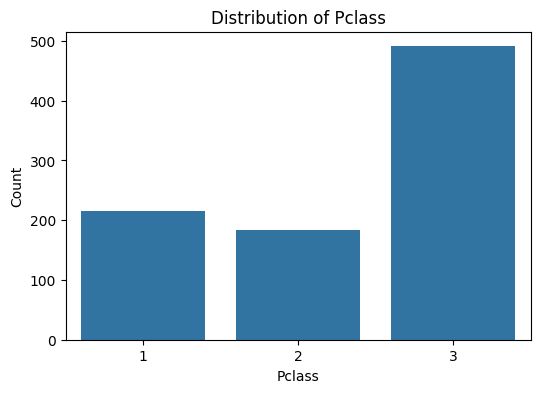

In [111]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=data_train)
plt.title('Distribution of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

The plot for Pclass showed that the majority of passengers were in Pclass 3, followed by Pclass 1, and then Pclass 2. This indicates that a higher number of passengers traveled in third class.


--- Visualizations for Age ---


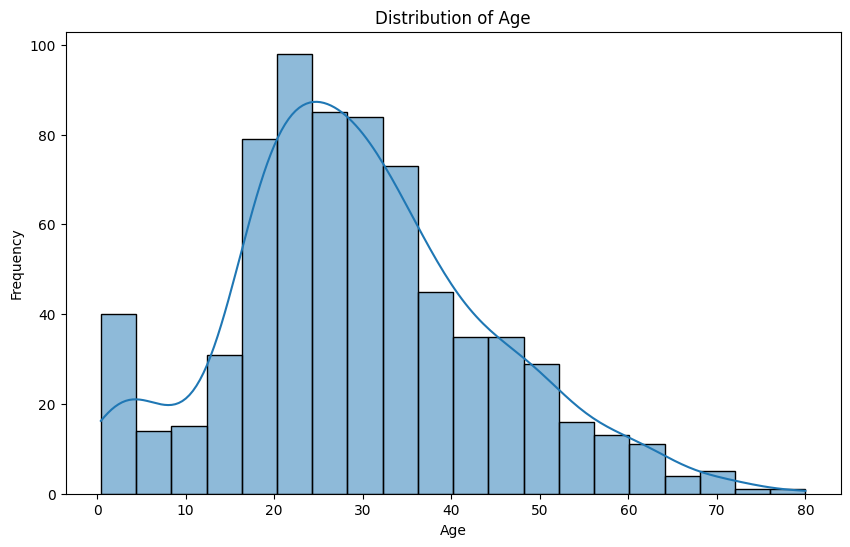

In [112]:
print("\n--- Visualizations for Age ---")

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_train['Age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

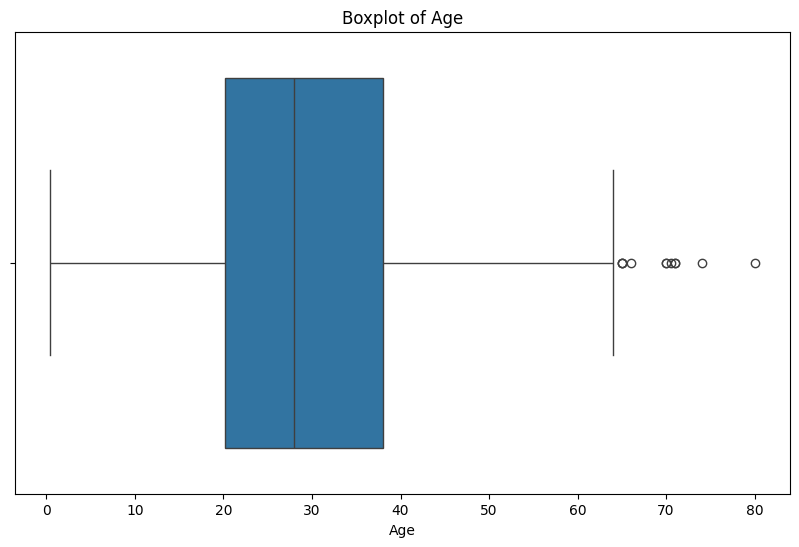

In [113]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_train['Age'].dropna())
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

The visualizations for the Age variable showed a relatively normal distribution, slightly right-skewed, indicating a higher number of younger passengers. The boxplot confirmed this and also highlighted some outliers, particularly older individuals.


--- Visualizations for SibSp ---


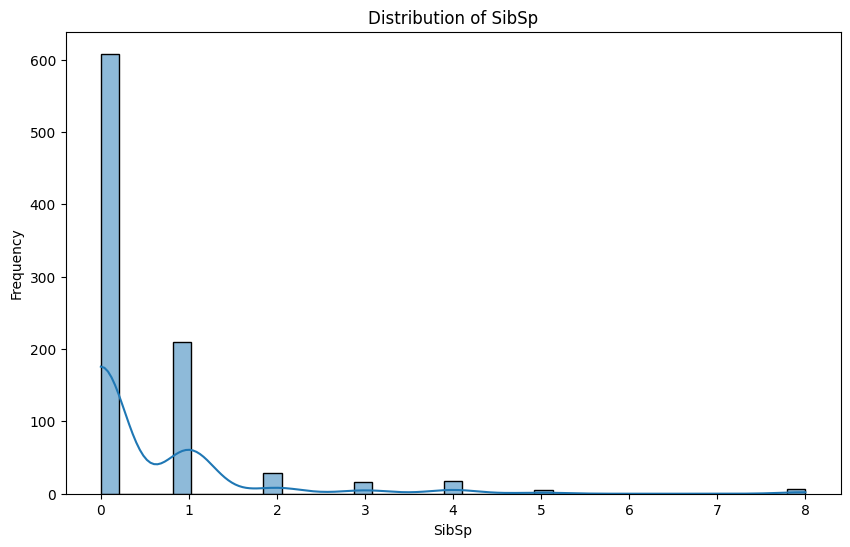

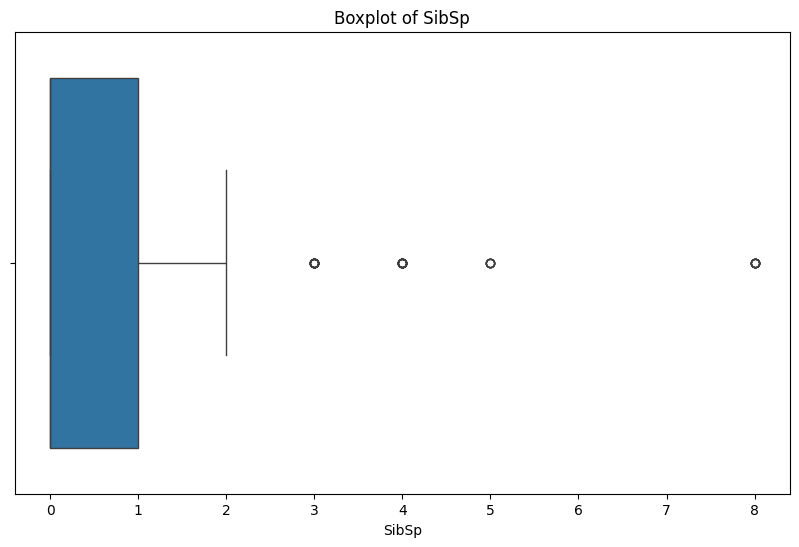

In [114]:
print("\n--- Visualizations for SibSp ---")

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_train['SibSp'].dropna(), kde=True)
plt.title('Distribution of SibSp')
plt.xlabel('SibSp')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_train['SibSp'].dropna())
plt.title('Boxplot of SibSp')
plt.xlabel('SibSp')
plt.show()

The visualizations for the SibSp variable showed a highly right-skewed distribution, indicating that most passengers traveled alone or with one sibling/spouse. The boxplot clearly identified outliers, representing a small number of passengers who traveled with a larger family group (more siblings or spouses).


--- Visualizations for Parch ---


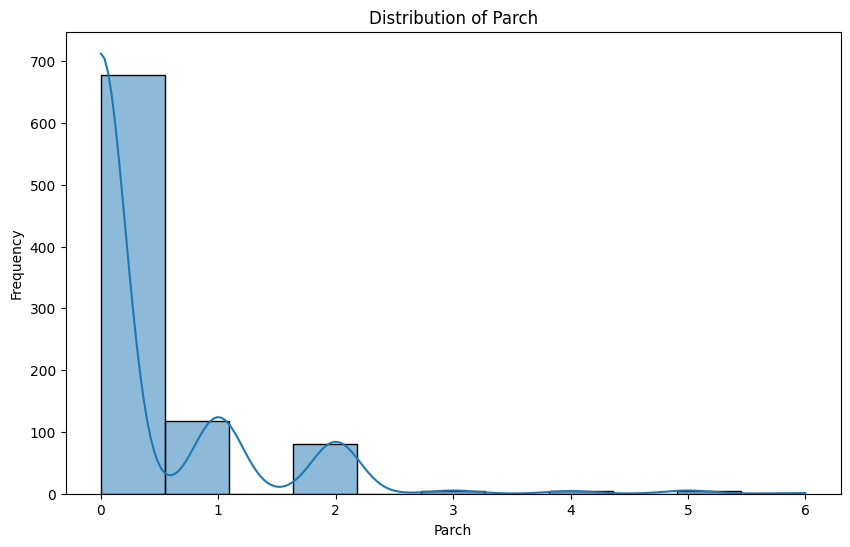

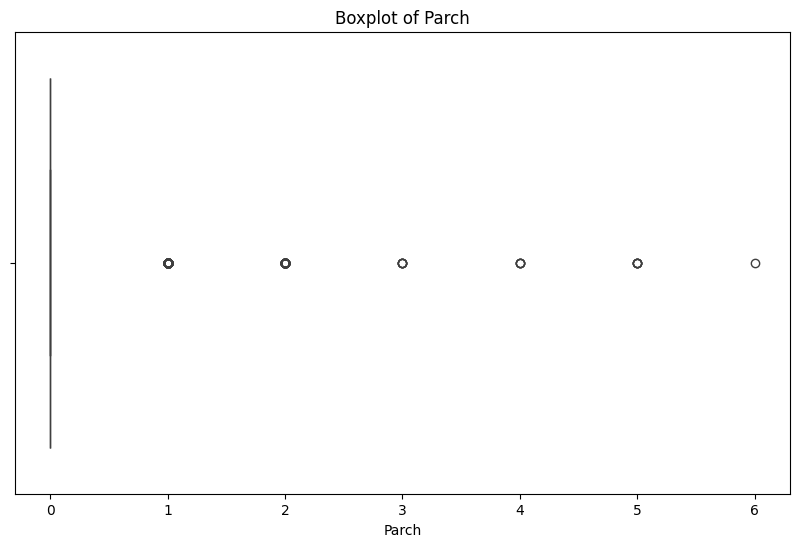

In [115]:
print("\n--- Visualizations for Parch ---")

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_train['Parch'].dropna(), kde=True)
plt.title('Distribution of Parch')
plt.xlabel('Parch')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_train['Parch'].dropna())
plt.title('Boxplot of Parch')
plt.xlabel('Parch')
plt.show()

The visualizations for the Parch variable showed a distribution heavily concentrated at 0, meaning most passengers did not travel with parents or children. The distribution was highly right-skewed, similar to 'SibSp', with decreasing frequencies for higher Parch values. Outliers were present, indicating a small number of passengers traveling with a larger number of parents or children.


--- Visualizations for Fare ---


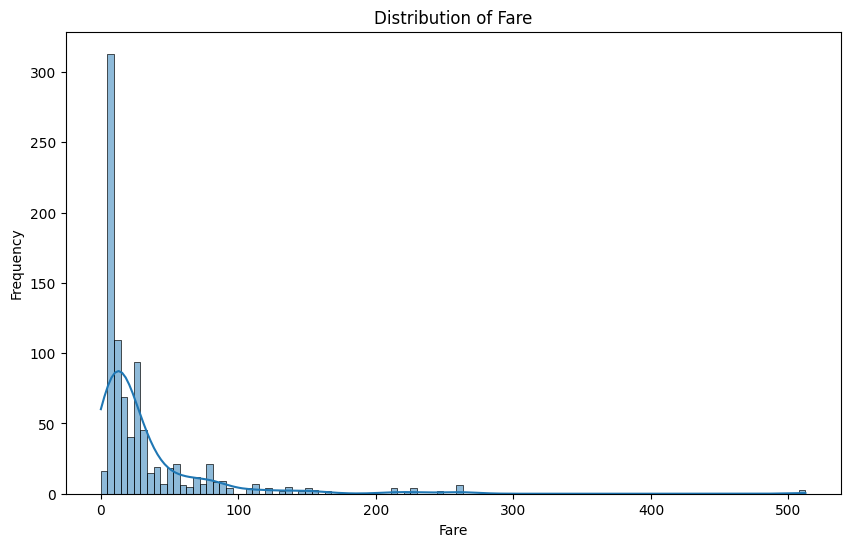

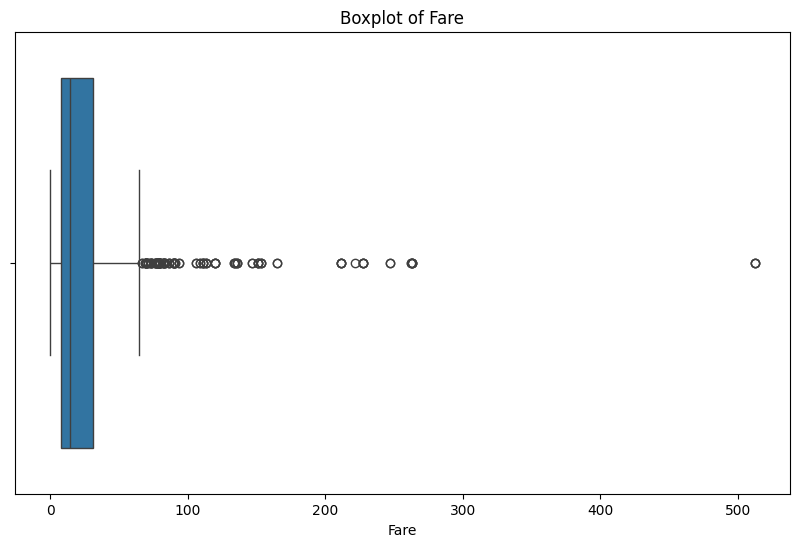

In [116]:
print("\n--- Visualizations for Fare ---")

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_train['Fare'].dropna(), kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_train['Fare'].dropna())
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.show()

The visualizations for the Fare variable showed a highly right-skewed distribution. This indicates that a large number of passengers paid lower fares, while a much smaller number paid significantly higher fares. There were also a substantial number of outliers at the higher end of the fare spectrum, meaning some passengers paid exceptionally high prices.

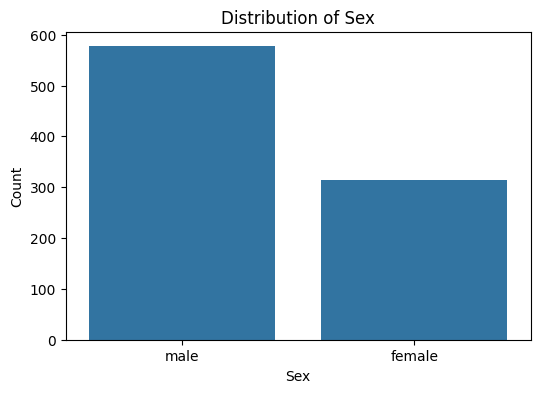

In [117]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=data_train)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Sex showed that there were significantly more male passengers than female passengers on board the Titanic. This is an important demographic observation that can be considered in further analyses, such as how gender might correlate with survival rates.

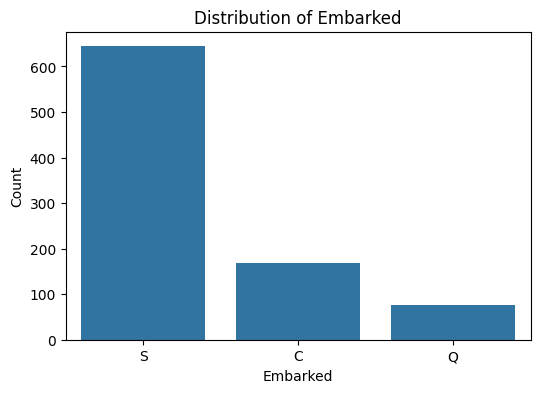

In [118]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', data=data_train)
plt.title('Distribution of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

### Insights from Embarked Distribution

The countplot for the 'Embarked' column reveals the following:

*   **Port S (Southampton)** is the most frequent embarkation port, significantly outnumbering the others.
*   **Port C (Cherbourg)** is the second most common port.
*   **Port Q (Queenstown)** has the fewest passengers embarking from it.

This distribution indicates that a large majority of passengers boarded the Titanic from Southampton.

## Explain Embarked Distribution

### Subtask:
Provide insights into the distribution of passengers across different embarkation points based on the generated plot.


## Summary:

### Data Analysis Key Findings

*   **Port S (Southampton)** is the most frequent embarkation port, with a significantly higher number of passengers compared to other ports.
*   **Port C (Cherbourg)** is the second most common embarkation point.
*   **Port Q (Queenstown)** has the fewest passengers embarking from it.

### Insights or Next Steps

*   The majority of passengers on the Titanic embarked from Southampton, suggesting a demographic concentration from that region.
*   Further analysis could explore if embarkation point correlates with survival rates or other passenger characteristics.


## Bivariate Analysis: Survived vs Sex

### Subtask:
Create a bar chart to visualize the relationship between 'Survived' and 'Sex', showing survival rates for male and female passengers.


**Reasoning**:
To visualize the relationship between 'Survived' and 'Sex', I will first group the data by 'Sex' and calculate the mean survival rate for each gender. Then, I will create a bar plot using seaborn to display these rates, adding appropriate labels and a title.



/tmp/ipython-input-3208389854.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=survived_by_sex, palette='viridis')


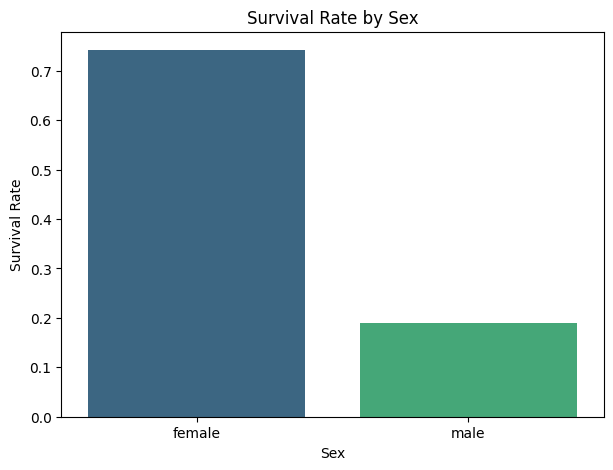

In [119]:
survived_by_sex = data_train.groupby('Sex')['Survived'].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(x='Sex', y='Survived', data=survived_by_sex, palette='viridis')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` due to the way `palette` was used with `sns.barplot`. To address this, I will update the `sns.barplot` call by explicitly setting `hue='Sex'` and `legend=False`, as suggested by the warning.



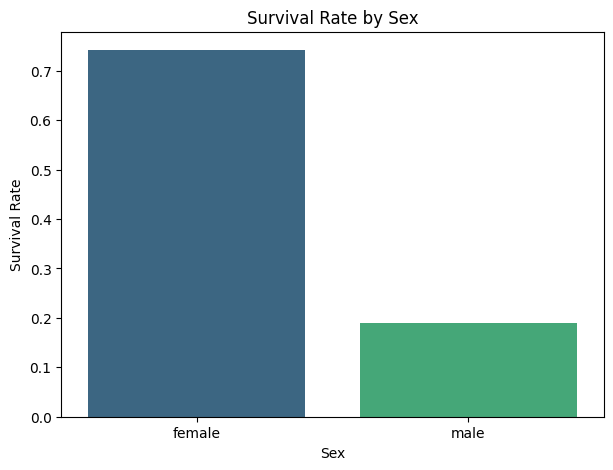

In [120]:
survived_by_sex = data_train.groupby('Sex')['Survived'].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(x='Sex', y='Survived', data=survived_by_sex, hue='Sex', palette='viridis', legend=False)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

## Explain Survived vs Sex Insights

### Subtask:
Provide insights into how gender correlates with survival rates, confirming the observation that women have a much higher survival rate.


## Explain Survived vs Sex Insights

### Insights from Survived vs Sex Distribution

The bar chart illustrating 'Survival Rate by Sex' clearly demonstrates a significant disparity in survival rates between genders:

*   **Female passengers** had a substantially higher survival rate compared to male passengers. The bar for 'female' is considerably taller, indicating that a much larger proportion of women survived.
*   **Male passengers** had a much lower survival rate.

This confirms the observation that gender played a crucial role in survival, with women having a much higher chance of surviving the Titanic disaster.

## Bivariate Analysis: Survived vs Pclass

### Subtask:
Create a bar chart to visualize the relationship between 'Survived' and 'Pclass', showing survival rates across different passenger classes.


**Reasoning**:
To visualize the relationship between 'Survived' and 'Pclass', I will first group the data by 'Pclass' and calculate the mean survival rate for each class. Then, I will create a bar plot using seaborn to display these rates, adding appropriate labels and a title.



/tmp/ipython-input-2804633642.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=survived_by_pclass, palette='viridis')


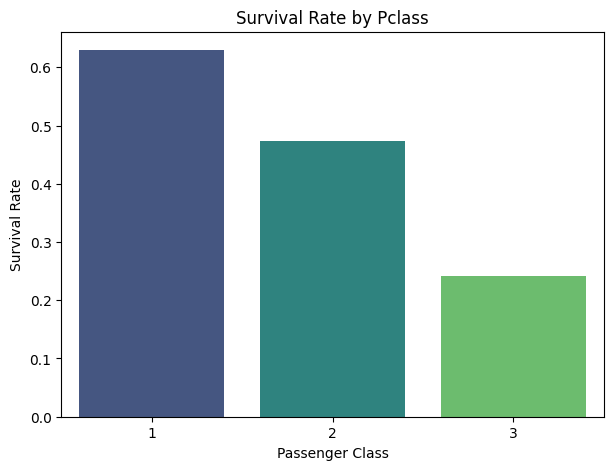

In [121]:
survived_by_pclass = data_train.groupby('Pclass')['Survived'].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(x='Pclass', y='Survived', data=survived_by_pclass, palette='viridis')
plt.title('Survival Rate by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without `hue`. To fix this, I will update the `sns.barplot` call by explicitly setting `hue='Pclass'` and `legend=False`, as suggested by the warning.



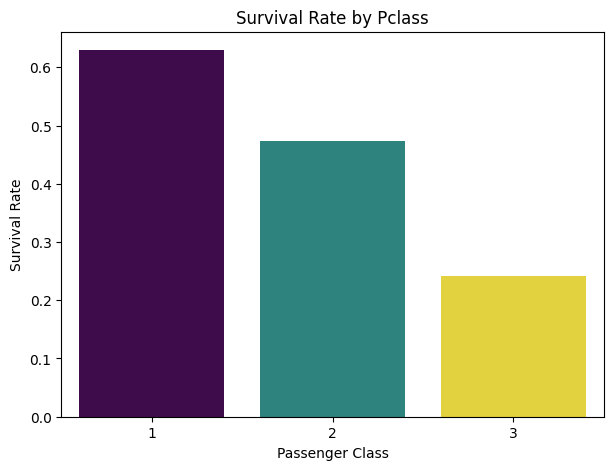

In [122]:
survived_by_pclass = data_train.groupby('Pclass')['Survived'].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(x='Pclass', y='Survived', data=survived_by_pclass, hue='Pclass', palette='viridis', legend=False)
plt.title('Survival Rate by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

## Explain Survived vs Pclass Insights

### Subtask:
Provide insights into how passenger class correlates with survival rates, confirming the observation that first-class passengers survive more.


## Explain Survived vs Pclass Insights

### Insights from Survived vs Pclass Distribution

The bar chart titled 'Survival Rate by Pclass' clearly illustrates a strong correlation between passenger class and survival rates:

*   **First-class passengers (Pclass 1)** had the highest survival rate, significantly higher than other classes. This confirms that those in first class were more likely to survive.
*   **Second-class passengers (Pclass 2)** had a moderate survival rate, which was higher than third class but notably lower than first class.
*   **Third-class passengers (Pclass 3)** had the lowest survival rate, indicating that they were the least likely to survive the disaster.

This analysis confirms the observation that passenger class played a crucial role in survival, with higher classes generally having a much greater chance of survival.

## Bivariate Analysis: Survived vs Embarked

### Subtask:
Create a bar chart to visualize the relationship between 'Survived' and 'Embarked', showing survival rates for each embarkation port.


**Reasoning**:
To visualize the relationship between 'Survived' and 'Embarked', I will first group the data by 'Embarked' and calculate the mean survival rate for each embarkation port. Then, I will create a bar plot using seaborn to display these rates, adding appropriate labels and a title, and ensuring the `hue` and `legend` arguments are correctly set to avoid warnings.



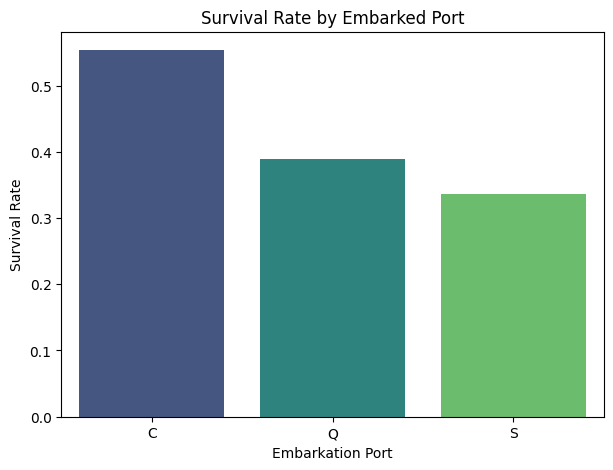

In [123]:
survived_by_embarked = data_train.groupby('Embarked')['Survived'].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(x='Embarked', y='Survived', data=survived_by_embarked, hue='Embarked', palette='viridis', legend=False)
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()

## Explain Survived vs Embarked Insights

### Insights from Survived vs Embarked Distribution

The bar chart titled 'Survival Rate by Embarked Port' provides the following insights into how the embarkation point correlates with survival rates:

*   **Port C (Cherbourg)** had the highest survival rate, indicating that passengers embarking from Cherbourg were more likely to survive.
*   **Port Q (Queenstown)** had a moderate survival rate, which was lower than Cherbourg but slightly higher than Southampton.
*   **Port S (Southampton)** had the lowest survival rate among the three ports, suggesting that passengers embarking from Southampton were less likely to survive the disaster.

## Summary of Categorical Bivariate Analysis

### Subtask:
Summarize the key findings and insights from the bivariate analysis of 'Sex', 'Pclass', and 'Embarked' against 'Survived'.


## Summary:

### Data Analysis Key Findings
*   **Survival Rate by Sex:** Female passengers had a substantially higher survival rate compared to male passengers.
*   **Survival Rate by Passenger Class (Pclass):** First-class passengers exhibited the highest survival rate, followed by second-class passengers with a moderate rate, and third-class passengers had the lowest survival rate.
*   **Survival Rate by Embarkation Port:** Passengers embarking from Cherbourg (Port C) had the highest survival rate, Queenstown (Port Q) had a moderate survival rate, and Southampton (Port S) had the lowest survival rate.

### Insights or Next Steps
*   Gender, passenger class, and embarkation port are critical factors that strongly correlate with survival rates, suggesting their importance in understanding the survival patterns of the Titanic disaster.
*   These identified strong correlations imply that 'Sex', 'Pclass', and 'Embarked' features will be highly valuable for building a predictive model for 'Survived'.


#  Variables À EXCLURE DU MODÈLE
# Variable			Raison
# PassengerId		Identifiant unique
# Name				Texte non informatif
# Ticket			Trop de valeurs uniques
# Cabin				Trop de valeurs manquantes

# These variables do not provide exploitable predictive information for a decision tree.

In [124]:
# Impute missing 'Age' values with the median
median_age = data_train['Age'].median()
data_train['Age'] = data_train['Age'].fillna(median_age)

# Impute missing 'Embarked' values with the mode
mode_embarked = data_train['Embarked'].mode()[0]
data_train['Embarked'] = data_train['Embarked'].fillna(mode_embarked)

# Display the count of missing values after imputation to verify
print("Missing values after imputation:")
display(data_train.isnull().sum())

Missing values after imputation:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [125]:
# Encode 'Sex' (male: 0, female: 1)
data_train['Sex'] = data_train['Sex'].map({'male': 0, 'female': 1})

print("DataFrame after 'Sex' encoding:")
display(data_train[['Sex']].head())

DataFrame after 'Sex' encoding:


,Sex
0,0
1,1
2,1
3,1
4,0


In [126]:
# One-Hot Encode 'Embarked'
data_train = pd.get_dummies(data_train, columns=['Embarked'], prefix='Embarked', drop_first=True)

print("DataFrame after 'Embarked' one-hot encoding:")
display(data_train[['Embarked_Q', 'Embarked_S']].head())

DataFrame after 'Embarked' one-hot encoding:


,Embarked_Q,Embarked_S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [127]:
# Convert 'Pclass' to an ordinal categorical type
data_train['Pclass'] = pd.Categorical(data_train['Pclass'], ordered=True, categories=[1, 2, 3])

print("DataFrame after 'Pclass' ordinal encoding:")
display(data_train[['Pclass']].head())
display(data_train['Pclass'].dtype)

DataFrame after 'Pclass' ordinal encoding:


,Pclass
0,3
1,1
2,3
3,1
4,3


CategoricalDtype(categories=[1, 2, 3], ordered=True, categories_dtype=int64)

# Task
Train a Decision Tree model to predict 'Survived' using the preprocessed `data_train` DataFrame, excluding 'PassengerId', 'Name', 'Ticket', 'Cabin', and the target 'Survived' as features, then split the data into 70% training and 30% testing sets, train the model, and evaluate its initial performance.

## Prepare Data for Modeling

### Subtask:
Identify the features (X) and the target variable (y) from the preprocessed `data_train` DataFrame, excluding any non-predictive columns.


**Reasoning**:
I will define the target variable `y` as the 'Survived' column and the feature matrix `X` by dropping the specified non-predictive columns from the `data_train` DataFrame. Then I will display the shapes of `X` and `y` to verify the new datasets.



In [128]:
y = data_train['Survived']
X = data_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (891, 8)
Shape of y: (891,)


## Split Data into Training and Testing Sets

### Subtask:
Divide the prepared data (X and y) into training (70%) and testing (30%) sets using `train_test_split`.


**Reasoning**:
To split the data into training and testing sets as requested by the subtask, I need to import the `train_test_split` function and then apply it to `X` and `y` with the specified parameters. I will also print the shapes to verify the split.



In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (623, 8)
Shape of X_test: (268, 8)
Shape of y_train: (623,)
Shape of y_test: (268,)


## Initialize Decision Tree Classifier

### Subtask:
Instantiate a DecisionTreeClassifier, considering criteria like 'Gini' or 'Entropy' and setting initial hyperparameters like `max_depth` and `min_samples_split`.


**Reasoning**:
To initialize the Decision Tree Classifier, I need to import the class from `sklearn.tree` and then create an instance with the specified hyperparameters.



In [130]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, random_state=42)

print("Decision Tree Classifier initialized successfully.")

Decision Tree Classifier initialized successfully.


**Reasoning**:
Now that the Decision Tree Classifier is initialized, the next step is to train the model using the training data (`X_train` and `y_train`) to learn the patterns for predicting survival.



In [131]:
dt_classifier.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully.")

Decision Tree Classifier trained successfully.


## Evaluate Decision Tree Model

### Subtask:
Evaluate the trained Decision Tree model's performance on the testing set using appropriate metrics such as accuracy, precision, recall, and F1-score.

#### Instructions:
1. Make predictions on the `X_test` data using the trained `dt_classifier`.
2. Calculate the accuracy score of the model.
3. Display the classification report, which includes precision, recall, and F1-score.
4. Display the confusion matrix to visualize the model's performance.

**Reasoning**:
To evaluate the model, I need to make predictions on the test set first, then calculate the accuracy score using the true labels and predicted labels.



In [132]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8097


**Reasoning**:
After calculating the accuracy, the next instruction is to display the classification report, which provides precision, recall, and F1-score.



In [133]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.83      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



**Reasoning**:
Following the instructions, the next step is to display the confusion matrix to visualize the model's performance.



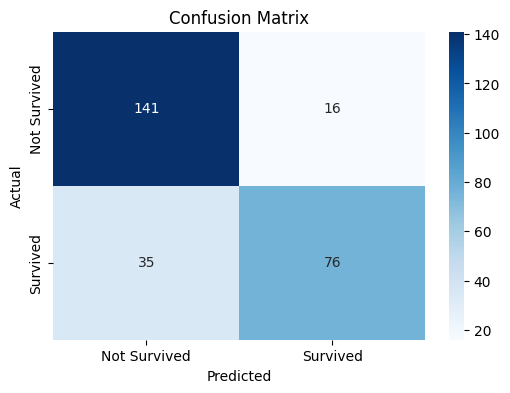

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The preprocessed `data_train` DataFrame was successfully prepared for modeling, with 891 samples and 8 features identified for the feature set (`X`) and 891 samples for the target variable (`y`).
*   The data was split into training and testing sets with a 70/30 ratio, resulting in 623 samples for training and 268 samples for testing.
*   A Decision Tree Classifier was initialized with `criterion='entropy'`, a maximum depth of 5, and a minimum of 10 samples required to split an internal node.
*   The trained Decision Tree model achieved an accuracy of approximately 80.97% on the test set.
*   The classification report revealed varied performance across classes:
    *   For the 'Not Survived' class (0), the model showed high recall (90%) and a precision of 80%, leading to an F1-score of 85%.
    *   For the 'Survived' class (1), the model achieved a precision of 83% but a lower recall of 68%, resulting in an F1-score of 75%.
*   The confusion matrix provided a visual breakdown of the model's predictions, indicating the counts of correctly and incorrectly classified instances for both 'Survived' and 'Not Survived' categories.

### Insights or Next Steps

*   The model performs better at identifying individuals who did not survive (higher recall for class 0) compared to those who did (lower recall for class 1). Future steps could involve techniques to balance this performance, potentially using class weighting or exploring different model architectures.
*   Given the initial performance, further hyperparameter tuning (e.g., exploring different `max_depth`, `min_samples_split`, or `criterion` values) or using cross-validation would be beneficial to optimize the model's performance and ensure generalization.


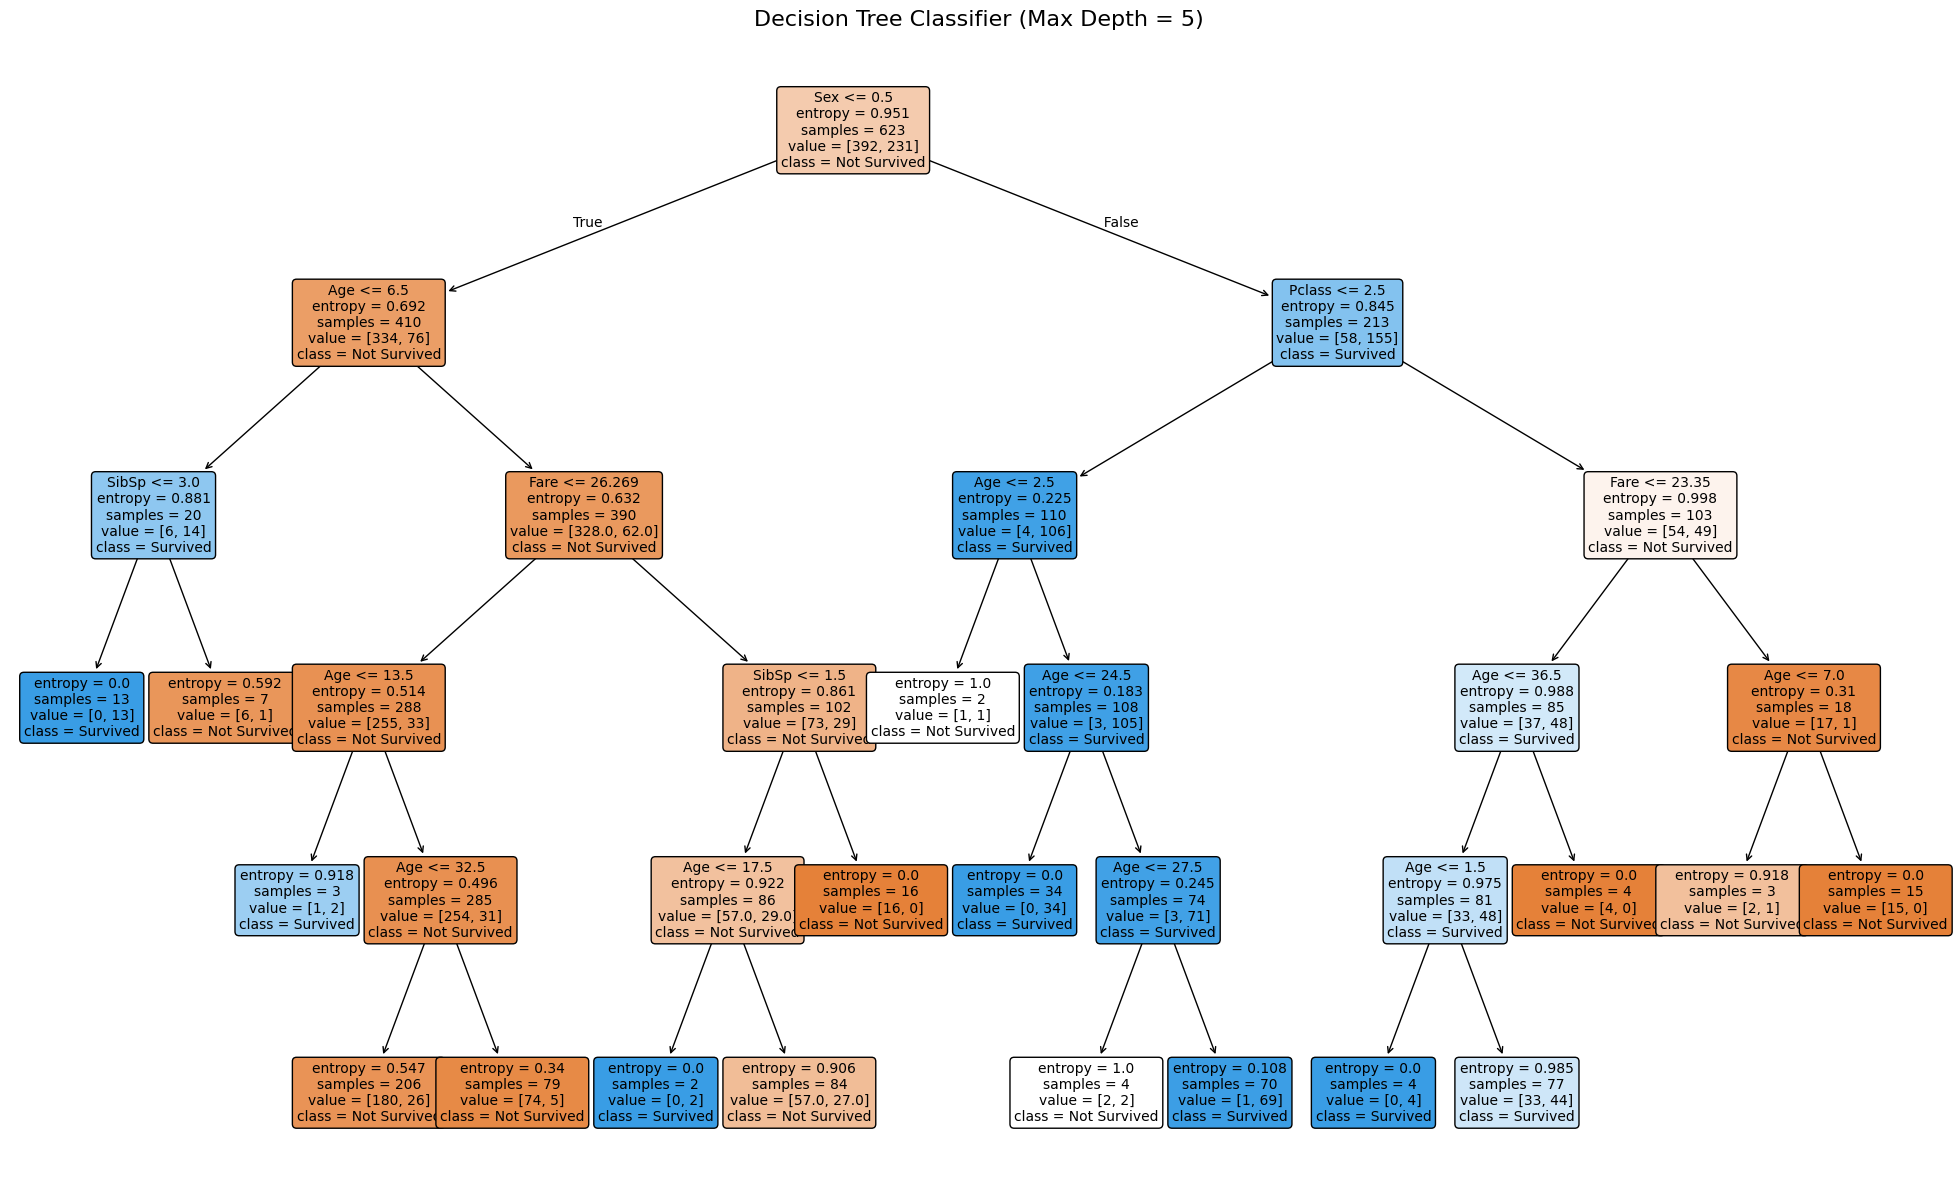

In [135]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 15))
plot_tree(dt_classifier,
          feature_names=X_train.columns.tolist(),
          class_names=['Not Survived', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Classifier (Max Depth = 5)', fontsize=16)
plt.show()

summary of the insights:

Root Node - Sex is the primary split: The tree first splits on Sex (female vs. male), indicating it's the most critical factor for survival. Males (Sex <= 0.5) tend to go down a 'Not Survived' path, while females (Sex > 0.5) have a higher initial chance of survival.
Female Survival Pathway: For female passengers, Pclass is the next major determinant. Women in Pclass 1 and 2 have very high survival rates. Even Pclass 3 women still have a better survival chance than most men, with further splits influenced by Age and Fare.
Male Survival Pathway: For male passengers, the path generally leads to 'Not Survived'. Age and Fare play roles in refining predictions, but overall survival probability remains low.
Influence of Other Features: Beyond Sex, Pclass, Age, and Fare are significant. For example, younger males might have a slightly better chance of survival, and their fate is further influenced by Parch.
In essence, the Decision Tree clearly shows that gender is the strongest predictor of survival, followed by passenger class. Age and Fare further refine these predictions, revealing the specific conditions under which passengers were more or less likely to survive.